In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from decimal import Decimal, getcontext
from ipynb.fs.full.functions import contour_plotter, vector_plotter

In [2]:
# Set the desired precision
getcontext().prec = 50

#  Grid Points

## elbow geommetry

In [3]:
L = 1              #meter
H = 0.5            #meter
L1 = 0.6           #meter
H1 = 0.2           #meter

In [4]:
A_in = 0.2*1       #meter^2
A_out = 0.1*1      #meter^2

In [5]:
U_in = 10          #meter/sec

## Grid

### delta_x

In [6]:
n1 = 21
n = (n1-1)/(L-L1)+1
dx = L/(n-1)

In [7]:
n, dx

(51.0, 0.02)

In [8]:
x = np.linspace(0, L, int(n))

### delta_y

In [9]:
m1 = 11
m = (H*(m1-1))/(H1)+1
dy = H/(m-1)

In [10]:
m, dy

(26.0, 0.02)

In [11]:
y = np.linspace(0, H, int(m))

In [12]:
psi = np.ones((len(y), len(x)))

In [13]:
u = np.zeros((len(y), len(x)))
v = np.zeros((len(y), len(x)))

In [14]:
for i in range(0, len(y)):
    
    for j in range(0, len(x)):
        
        #Null Area:
        if (y[i]<H1)&(x[j]>(L-L1)):
            
            psi[i][j] = 0
            u[i][j] = 0
            v[i][j] = 0
            
        #inlet:    
        if (y[i]==0)&((L-L1)-A_in<x[j]<(L-L1)):
            
            psi[i][j] = (x[j]-((L-L1)-A_in))/((L-L1)-((L-L1)-A_in))*(U_in*A_in)
            u[i][j] = 0
            v[i][j] = -U_in
            
        #upper:
        if (y[i]<H1)&(x[j]==(L-L1)):
            
            psi[i][j] = U_in*A_in
            u[i][j] = 0
            v[i][j] = 0
            
        if ((H1)<y[i]<=(H-A_out))&(x[j]==1):
            psi[i][j] = U_in*A_in
            u[i][j] = 0
            v[i][j] = 0
            
        if (y[i]==H1)&(x[j]>=(L-L1)):
            
            psi[i][j] = U_in*A_in
            u[i][j] = 0
            v[i][j] = 0
                        
        #lower:
        if (y[i]==0)&(x[j]<=(L-L1)-A_in):
            
            psi[i][j] = 0
            u[i][j] = 0
            v[i][j] = 0
            
        if y[i]==H:
            
            psi[i][j] = 0
            u[i][j] = 0
            v[i][j] = 0
            
        if x[j]==0:
            
            psi[i][j] = 0
            u[i][j] = 0
            v[i][j] = 0
            
        #outlet:
        if (y[i]>(H-A_out))&(x[j]==1):
            
            psi[i][j] = (y[i]-(H-A_out))/(H-(H-A_out))*(-(U_in*A_in))+(U_in*A_in)
            u[i][j] = U_in
            v[i][j] = 0

This is our primary guess:

In [15]:
psi

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 1. , ..., 0. , 0. , 0. ],
       [0. , 1. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 1. , ..., 1. , 1. , 0.8],
       [0. , 1. , 1. , ..., 1. , 1. , 0.4],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

# Gaus Sidel

In [16]:
error = 10**(-4)

In [17]:
psi_pi = np.zeros((len(y), len(x)))         #pi stands for previous iteration

In [18]:
beta = dx/dy

In [19]:
beta

1.0

In [20]:
psi_calculated_GS = np.zeros((len(y), len(x)))
psi_calculated_GS[:] = psi[:]

In [21]:
iteration = 1

this is iteration 1
this is iteration 2
this is iteration 3
this is iteration 4
this is iteration 5
this is iteration 6
this is iteration 7
this is iteration 8
this is iteration 9
this is iteration 10
this is iteration 11
this is iteration 12
this is iteration 13
this is iteration 14
this is iteration 15
this is iteration 16
this is iteration 17
this is iteration 18
this is iteration 19
this is iteration 20
this is iteration 21
this is iteration 22
this is iteration 23
this is iteration 24
this is iteration 25
this is iteration 26
this is iteration 27
this is iteration 28
this is iteration 29
this is iteration 30
this is iteration 31
this is iteration 32
this is iteration 33
this is iteration 34
this is iteration 35
this is iteration 36
this is iteration 37
this is iteration 38
this is iteration 39
this is iteration 40
this is iteration 41
this is iteration 42
this is iteration 43
this is iteration 44
this is iteration 45
this is iteration 46
this is iteration 47
this is iteration 48
t

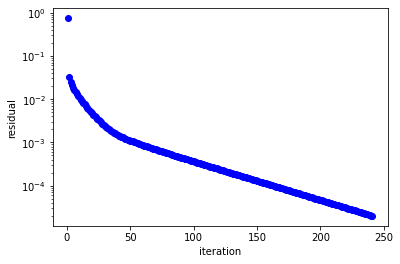

In [22]:
while ((abs(psi_pi-psi_calculated_GS)>error).any()):        
     
    print(f'this is iteration {iteration}')
    
    if iteration > 1:
        for i in range(1, len(y)-1):
            psi_pi[:] = psi_calculated_GS[:]
        
        
    for i in range(1, len(y)-1):
        
        for j in range(1, len(x)-1):
            
            if (y[i]<=H1)&(x[j]>=(L-L1)):
                
                continue
            
            a = psi_calculated_GS[i+1][j]
            b = psi_calculated_GS[i-1][j]
            c = psi_calculated_GS[i][j+1]
            d = psi_calculated_GS[i][j-1]
            e = psi_calculated_GS[i+1][j-1]
            f = psi_calculated_GS[i-1][j-1]
            g = psi_calculated_GS[i+1][j+1]
            h = psi_calculated_GS[i-1][j+1]
            psi_calculated_GS[i][j] = (e+f+g+h-2*(dx**2-5*dy**2)/(dx**2+dy**2)*(c+d)+2*(5*dx**2-dy**2)/(dx**2+dy**2)*(a+b))/20
    
    plt.plot(iteration, np.mean((abs(psi_pi-psi_calculated_GS))), marker = "o", color='blue', linestyle = "solid")
    plt.xlabel('iteration')
    plt.ylabel('residual')
    plt.yscale('log')
    iteration += 1

## Psi Contours

In [23]:
for i in range(0, len(y)):
    
    for j in range(0, len(x)):
        
        if (y[i]<H1)&(x[j]>(L-L1)):
            
            psi_calculated_GS[i][j] = 0

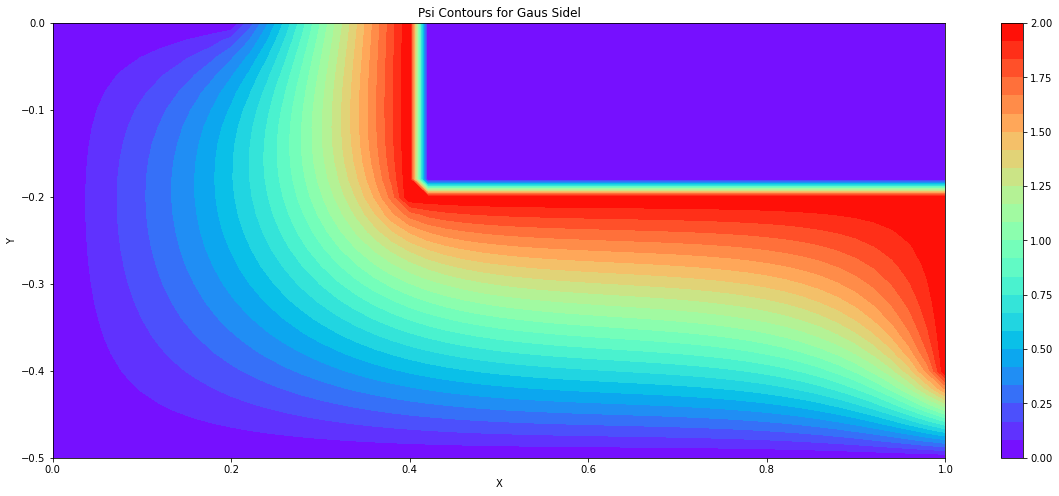

In [24]:
contour_plotter((20,8), x, y, psi_calculated_GS, 25, 'Psi Contours for Gaus Sidel')

## u&v

In [25]:
 for i in range(1, len(y)-1):
        
        for j in range(1, len(x)-1):
            
            if (y[i]<=H1)&(x[j]>=(L-L1)):
                u[i][j] = 0
                v[i][j] = 0
                continue
            
            a = psi_calculated_GS[i+1][j]
            b = psi_calculated_GS[i-1][j]
            c = psi_calculated_GS[i][j+1]
            d = psi_calculated_GS[i][j-1]
            u[i][j] = -(a-b)/2/dy
            v[i][j] = -(c-d)/2/dx

## Velocity Vectors

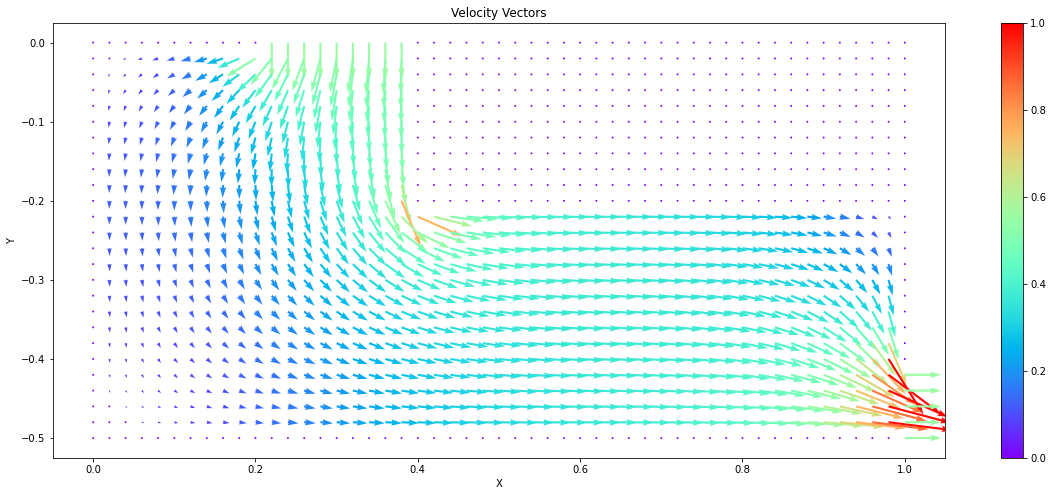

In [26]:
vector_plotter(x, y, u, v, 'Velocity Vectors', 'rainbow')

# TDM

In [27]:
def TDM(a, b, c, d):
    u = np.zeros(len(a))
    decimal_calculation = np.vectorize(lambda x, y, z, p: Decimal(str(x)) - Decimal(str(y)) / Decimal(str(z)) * Decimal(str(p)))
    
    for j in range(1, len(a)):
        
        d[j] = decimal_calculation(d[j], b[j], d[j-1], a[j-1])
        c[j] = decimal_calculation(c[j], b[j], d[j-1], c[j-1])
        
    for j in range(len(a)-1, -1, -1):
        
        if j==len(a)-1:
            
            decimal_calculation = np.vectorize(lambda x, y: Decimal(str(x)) / Decimal(str(y)))
            u[j] = decimal_calculation(c[j], d[j])
        
        elif j<len(a)-1:
        
            decimal_calculation = np.vectorize(lambda x, y, z, p: (Decimal(str(x)) - Decimal(str(y)) * Decimal(str(z))) / Decimal(str(p)))
            u[j] = decimal_calculation(c[j], a[j], u[j+1], d[j])
            
    return u

In [28]:
a = np.array([1/3, 1, 1, 1])
b = np.array([1, 1, 1, 1])
c = np.array([1, 2, 3, 4])
d = np.array([3, 3, 3, 3])

In [29]:
TDM(a, b, c, d)

array([0.29166667, 0.375     , 0.25      , 1.5       ])

# Line Gaus Sidel

In [30]:
psi_pi = np.zeros((len(y), len(x)))                 #pi stands for previous iteration
psi_calculated_LGS = np.zeros((len(y), len(x)))
psi_calculated_LGS[:] = psi[:]

In [31]:
iteration = 1

this is iteration 1
this is iteration 2
this is iteration 3
this is iteration 4
this is iteration 5
this is iteration 6
this is iteration 7
this is iteration 8
this is iteration 9
this is iteration 10
this is iteration 11
this is iteration 12
this is iteration 13
this is iteration 14
this is iteration 15
this is iteration 16
this is iteration 17
this is iteration 18
this is iteration 19
this is iteration 20
this is iteration 21
this is iteration 22
this is iteration 23
this is iteration 24
this is iteration 25
this is iteration 26
this is iteration 27
this is iteration 28
this is iteration 29
this is iteration 30
this is iteration 31
this is iteration 32
this is iteration 33
this is iteration 34
this is iteration 35
this is iteration 36
this is iteration 37
this is iteration 38
this is iteration 39
this is iteration 40
this is iteration 41
this is iteration 42
this is iteration 43
this is iteration 44
this is iteration 45
this is iteration 46
this is iteration 47
this is iteration 48
t

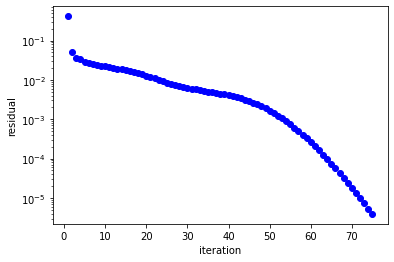

In [32]:
while ((abs(psi_pi-psi_calculated_LGS)>error).any()):        
     
    print(f'this is iteration {iteration}')
    
    if iteration > 1:
        for i in range(1, len(y)-1):
            psi_pi[:] = psi_calculated_LGS[:]
        
        
    for i in range(1, len(y)-1):
        
        if y[i]<=H1:
            
            n = np.where(x == L-L1)[0][0]+1
            
        else:
            
            n = len(x)-1
            
        a, b, c, d = [], [], [], []
        
        for j in range(1, n):
            
            #first point:
            if j==1:
                
                b.append(0)
                a.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                
            #last point:
            
            if j==n-1:
                
                b.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                a.append(0)  
                
            #middle points:
            
            if 1<j<n-1:
                
                b.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                a.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                
            A = psi_calculated_LGS[i+1][j]
            B = psi_pi[i-1][j]
            e = psi_calculated_LGS[i+1][j-1]
            f = psi_pi[i-1][j-1]
            g = psi_calculated_LGS[i+1][j+1]
            h = psi_pi[i-1][j+1]
            
            d.append(-20)
            c.append(-(2*(5*dx**2-dy**2)/(dx**2+dy**2)*(A+B)+e+f+g+h))
         
        
        #print(i)
        #print('c')
        #print(np.array(c))
        #print('u')
        psi_calculated_LGS[i][:n-1] = TDM(np.array(a), np.array(b), np.array(c), np.array(d))
        #print(psi_calculated_LGS[i][:n-1])
        

    
    plt.plot(iteration, np.mean((abs(psi_pi-psi_calculated_LGS))), marker = "o", color='blue', linestyle = "solid")
    plt.xlabel('iteration')
    plt.ylabel('residual')
    plt.yscale('log')
    iteration += 1

In [33]:
for i in range(0, len(y)):
    
    for j in range(0, len(x)):
        
        if (y[i]<H1)&(x[j]>(L-L1)):
            
            psi_calculated_LGS[i][j] = 0

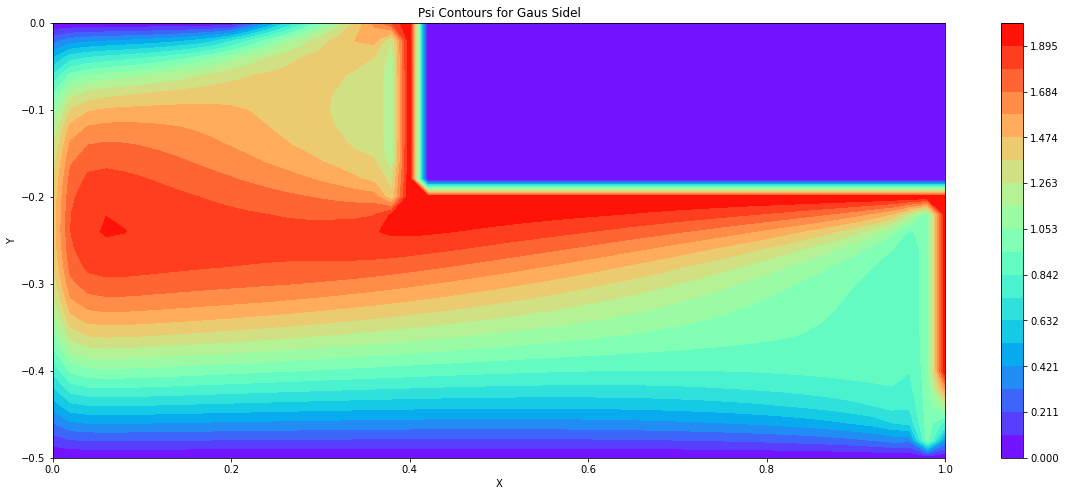

In [34]:
contour_plotter((20,8), x, y, psi_calculated_LGS, 20, 'Psi Contours for Gaus Sidel')

In [35]:
 for i in range(1, len(y)-1):
        
        for j in range(1, len(x)-1):
            
            if (y[i]<=H1)&(x[j]>=(L-L1)):
                u[i][j] = 0
                v[i][j] = 0
                continue
            
            a = psi_calculated_LGS[i+1][j]
            b = psi_calculated_LGS[i-1][j]
            c = psi_calculated_LGS[i][j+1]
            d = psi_calculated_LGS[i][j-1]
            u[i][j] = -(a-b)/2/dy
            v[i][j] = -(c-d)/2/dx

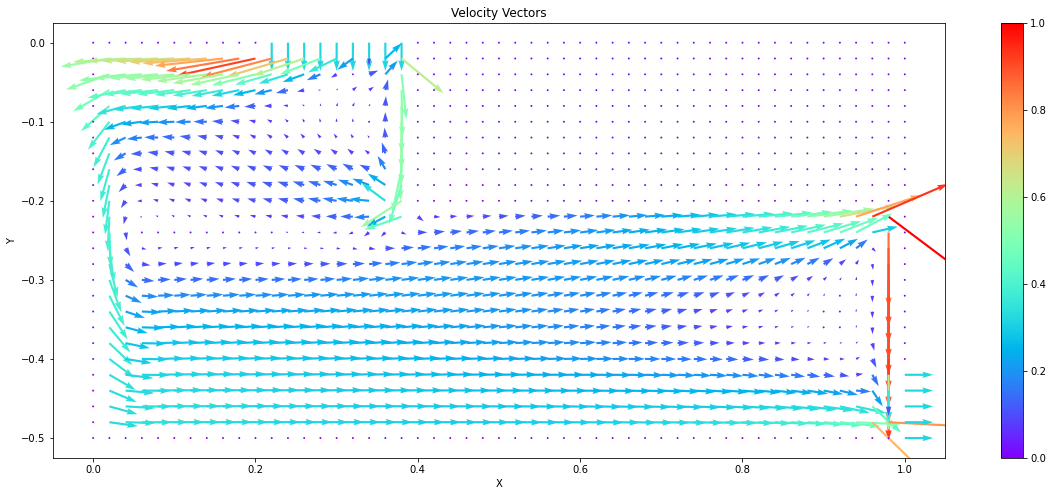

In [36]:
vector_plotter(x, y, u, v, 'Velocity Vectors', 'rainbow')

# PSOR

In [37]:
psi_pi = np.zeros((len(y), len(x)))                 #pi stands for previous iteration
psi_calculated_PSOR = np.zeros((len(y), len(x)))
psi_calculated_PSOR[:] = psi[:]

In [38]:
iteration = 1

In [39]:
a = ((math.cos(math.pi/(n-1))+beta**2*math.cos(math.pi/(m-1)))/(1+beta**2))**2
omega_opt = 2*(1-(abs(1-a))**0.5)/a

In [40]:
omega_opt

1.818884362400307

In [41]:
#omega_opt = 1.9

this is iteration 1
this is iteration 2
this is iteration 3
this is iteration 4
this is iteration 5
this is iteration 6
this is iteration 7
this is iteration 8
this is iteration 9
this is iteration 10
this is iteration 11
this is iteration 12
this is iteration 13
this is iteration 14
this is iteration 15
this is iteration 16
this is iteration 17
this is iteration 18
this is iteration 19
this is iteration 20
this is iteration 21
this is iteration 22
this is iteration 23
this is iteration 24
this is iteration 25
this is iteration 26
this is iteration 27
this is iteration 28
this is iteration 29
this is iteration 30
this is iteration 31
this is iteration 32
this is iteration 33
this is iteration 34
this is iteration 35
this is iteration 36
this is iteration 37
this is iteration 38
this is iteration 39
this is iteration 40
this is iteration 41
this is iteration 42
this is iteration 43
this is iteration 44
this is iteration 45
this is iteration 46
this is iteration 47
this is iteration 48
t

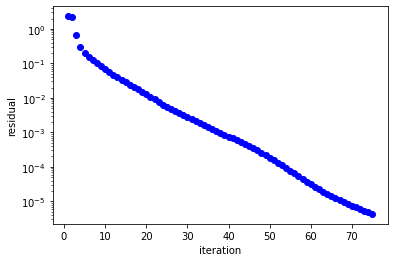

In [42]:
while ((abs(psi_pi-psi_calculated_PSOR)>error).any()):        
     
    print(f'this is iteration {iteration}')
    
    if iteration > 1:
        for i in range(1, len(y)-1):
            psi_pi[:] = psi_calculated_PSOR[:]
        
        
    for i in range(1, len(y)-1):
        
        for j in range(1, len(x)-1):
            
            if (y[i]<=H1)&(x[j]>=(L-L1)):
                
                continue
            
            a = psi_calculated_PSOR[i+1][j]
            b = psi_calculated_PSOR[i-1][j]
            c = psi_calculated_PSOR[i][j+1]
            d = psi_calculated_PSOR[i][j-1]
            e = psi_calculated_GS[i+1][j-1]
            f = psi_calculated_GS[i-1][j-1]
            g = psi_calculated_GS[i+1][j+1]
            h = psi_calculated_GS[i-1][j+1]
            l = psi_pi[i][j]
            psi_calculated_PSOR[i][j] = l+omega_opt*((e+f+g+h-2*(dx**2-5*dy**2)/(dx**2+dy**2)*(c+d)+2*(5*dx**2-dy**2)/(dx**2+dy**2)*(a+b))/20-l)
    
    plt.plot(iteration, np.mean((abs(psi_pi-psi_calculated_PSOR))), marker = "o", color='blue', linestyle = "solid")
    plt.xlabel('iteration')
    plt.ylabel('residual')
    plt.yscale('log')
    iteration += 1

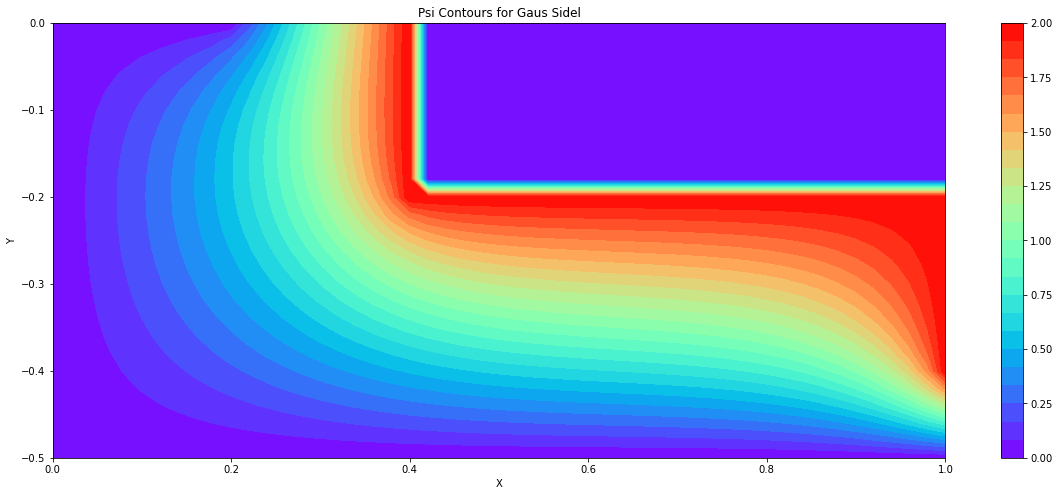

In [43]:
contour_plotter((20,8), x, y, psi_calculated_PSOR, 25, 'Psi Contours for Gaus Sidel')

In [44]:
 for i in range(1, len(y)-1):
        
        for j in range(1, len(x)-1):
            
            if (y[i]<=H1)&(x[j]>=(L-L1)):
                u[i][j] = 0
                v[i][j] = 0
                continue
            
            a = psi_calculated_PSOR[i+1][j]
            b = psi_calculated_PSOR[i-1][j]
            c = psi_calculated_PSOR[i][j+1]
            d = psi_calculated_PSOR[i][j-1]
            u[i][j] = -(a-b)/2/dy
            v[i][j] = -(c-d)/2/dx

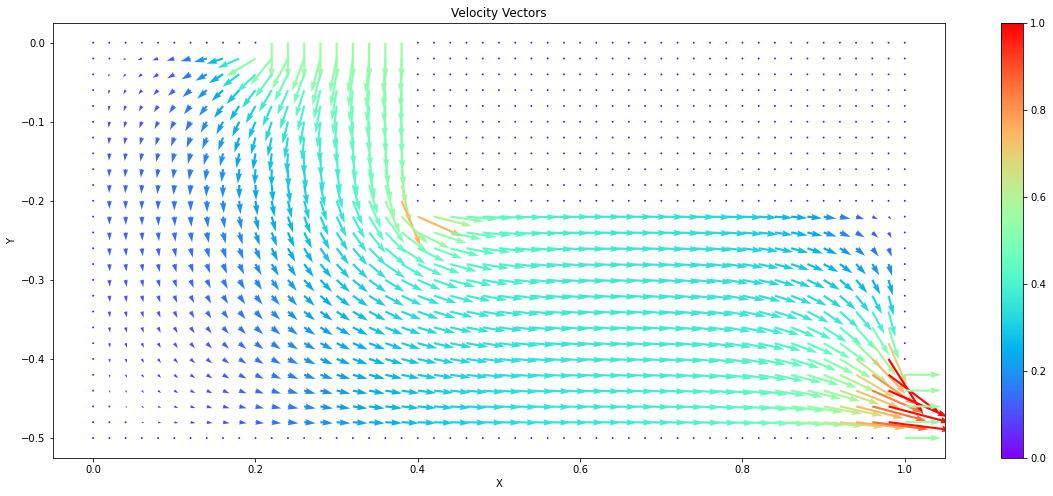

In [45]:
vector_plotter(x, y, u, v, 'Velocity Vectors', 'rainbow')

# LSOR

In [46]:
psi_pi = np.zeros((len(y), len(x)))                 #pi stands for previous iteration
psi_calculated_LSOR = np.zeros((len(y), len(x)))
psi_calculated_LSOR[:] = psi[:]

In [47]:
iteration = 1

this is iteration 1
this is iteration 2
this is iteration 3
this is iteration 4
this is iteration 5
this is iteration 6
this is iteration 7
this is iteration 8
this is iteration 9
this is iteration 10
this is iteration 11
this is iteration 12
this is iteration 13
this is iteration 14
this is iteration 15
this is iteration 16
this is iteration 17
this is iteration 18
this is iteration 19
this is iteration 20
this is iteration 21
this is iteration 22
this is iteration 23
this is iteration 24
this is iteration 25
this is iteration 26
this is iteration 27
this is iteration 28
this is iteration 29
this is iteration 30
this is iteration 31
this is iteration 32
this is iteration 33
this is iteration 34
this is iteration 35
this is iteration 36
this is iteration 37
this is iteration 38
this is iteration 39
this is iteration 40
this is iteration 41
this is iteration 42
this is iteration 43
this is iteration 44
this is iteration 45
this is iteration 46
this is iteration 47
this is iteration 48
t

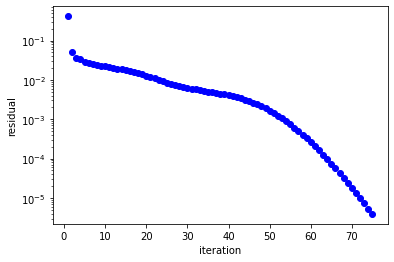

In [48]:
while ((abs(psi_pi-psi_calculated_LSOR)>error).any()):        
     
    print(f'this is iteration {iteration}')
    
    if iteration > 1:
        for i in range(1, len(y)-1):
            psi_pi[:] = psi_calculated_LSOR[:]
        
        
    for i in range(1, len(y)-1):
        
        if y[i]<=H1:
            
            n = np.where(x == L-L1)[0][0]+1
            
        else:
            
            n = len(x)-1
            
        a, b, c, d = [], [], [], []
        
        for j in range(1, n):
            
            #first point:
            if j==1:
                
                b.append(0)
                a.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                
            #last point:
            
            if j==n-1:
                
                b.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                a.append(0)  
                
            #middle points:
            
            if 1<j<n-1:
                
                b.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                a.append(-2*(dx**2-5*dy**2)/(dx**2+dy**2))
                
            A = psi_calculated_LSOR[i+1][j]
            B = psi_pi[i-1][j]
            e = psi_calculated_LSOR[i+1][j-1]
            f = psi_pi[i-1][j-1]
            g = psi_calculated_LSOR[i+1][j+1]
            h = psi_pi[i-1][j+1]
            
            d.append(-20)
            c.append(-(2*(5*dx**2-dy**2)/(dx**2+dy**2)*(A+B)+e+f+g+h))
         
        
        #print(i)
        #print('c')
        #print(np.array(c))
        #print('u')
        psi_calculated_LSOR[i][:n-1] = TDM(np.array(a), np.array(b), np.array(c), np.array(d))
        #print(psi_calculated_LGS[i][:n-1])
        

    
    plt.plot(iteration, np.mean((abs(psi_pi-psi_calculated_LSOR))), marker = "o", color='blue', linestyle = "solid")
    plt.xlabel('iteration')
    plt.ylabel('residual')
    plt.yscale('log')
    iteration += 1